In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

## Classifier Without Imbalanced Technique

In [2]:
df= pd.read_csv('heart2022python.csv')
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
0,0,2,4,0,1,9,0,0,0,0,...,10,1.60,71.67,27.99,0,0,1,1,0,0
1,1,2,0,0,1,6,0,0,0,0,...,11,1.78,95.25,30.13,0,0,1,1,0,0
2,1,2,0,0,0,8,0,0,0,0,...,12,1.85,108.86,31.66,1,0,0,1,0,1
3,0,4,5,0,1,9,0,0,0,0,...,13,1.70,90.72,31.32,0,0,1,1,0,1
4,0,3,3,15,1,5,0,0,0,0,...,13,1.55,79.38,33.07,0,0,1,1,0,0


In [3]:
df.shape
df['HadHeartAttack'].value_counts()
df.drop(['SleepHours',"DeafOrHardOfHearing",'BlindOrVisionDifficulty',"DifficultyConcentrating","DifficultyWalking",'DifficultyDressingBathing',"DifficultyErrands","ECigaretteUsage","ChestScan",'HeightInMeters',"WeightInKilograms","HIVTesting",'FluVaxLast12',"PneumoVaxEver","HighRiskLastYear","CovidPos"],axis=1,inplace=True)



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sex                    246022 non-null  int64  
 1   GeneralHealth          246022 non-null  int64  
 2   PhysicalHealthDays     246022 non-null  int64  
 3   MentalHealthDays       246022 non-null  int64  
 4   PhysicalActivities     246022 non-null  int64  
 5   HadHeartAttack         246022 non-null  int64  
 6   HadAngina              246022 non-null  int64  
 7   HadStroke              246022 non-null  int64  
 8   HadAsthma              246022 non-null  int64  
 9   HadSkinCancer          246022 non-null  int64  
 10  HadCOPD                246022 non-null  int64  
 11  HadDepressiveDisorder  246022 non-null  int64  
 12  HadKidneyDisease       246022 non-null  int64  
 13  HadArthritis           246022 non-null  int64  
 14  HadDiabetes            246022 non-nu

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
x = df.drop(["HadHeartAttack"] , axis = 1).values
y = df["HadHeartAttack"].values

In [7]:
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

173755 173755
57919 57919


## scalar

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

173755 173755
57919 57919


## Randomforest

In [9]:



# # Inicjalizacja modelu z domyślnymi parametrami
# rf = RandomForestClassifier()

# # Określenie siatki parametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew
#     'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
#     'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
# }

# # Utworzenie obiektu GridSearchCV
# cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# cv_rf.fit(x_train, y_train)

# # Najlepszy zestaw parametrów
# print("Najlepsze parametry: ", cv_rf.best_params_)

# # Najlepszy estimator
# best_rf = cv_rf.best_estimator_

params = {
    'n_estimators': 200,  
    'max_depth': 10,       
    'min_samples_split': 4,   
    'min_samples_leaf': 1,    
    'max_features': 'sqrt'
}

gb_clf = RandomForestClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    max_features=params['max_features']
)
gb_clf.fit(x_train, y_train)

# Predykcje i ocena modelu
ypred_train = gb_clf.predict(x_train)
ypred_test = gb_clf.predict(x_test)

print("Training Results\n")
print(classification_report(y_train, ypred_train))
print("Test Results\n")
print(classification_report(y_test, ypred_test))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test, ypred_test)
print("Confusion Matrix:\n", conf_matrix)

# Ocena modelu za pomocą walidacji krzyżowej
# cross_val_scores = cross_val_score(gb_clf, x_train, y_train, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

Training Results

              precision    recall  f1-score   support

           0       0.95      1.00      0.97    163707
           1       0.82      0.20      0.32     10048

    accuracy                           0.95    173755
   macro avg       0.89      0.60      0.65    173755
weighted avg       0.95      0.95      0.94    173755

Test Results

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     54560
           1       0.62      0.13      0.22      3359

    accuracy                           0.95     57919
   macro avg       0.79      0.56      0.60     57919
weighted avg       0.93      0.95      0.93     57919

Confusion Matrix:
 [[54288   272]
 [ 2910   449]]


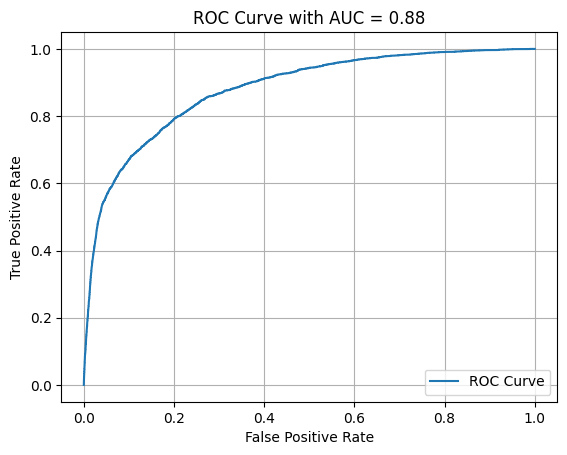

In [10]:



y_proba_test = gb_clf.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [11]:


# # Parametry do przetestowania w Grid Search
# param_grid = {
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'criterion': ['gini', 'entropy']
# }

# # Utworzenie modelu drzewa decyzyjnego
# tree = DecisionTreeClassifier()

# # Uruchomienie Grid Search z walidacją krzyżową
# grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(x_train, y_train)

# # Wyświetlenie najlepszych parametrów i wyników
# print("Najlepsze parametry:", grid_search.best_params_)
# print("Najlepsza dokładność:", grid_search.best_score_)

# # Utworzenie i ocena modelu z najlepszymi parametrami
# best_tree = grid_search.best_estimator_
# best_tree.fit(x_train, y_train)

params = {
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'criterion': 'gini'
}

best_tree = DecisionTreeClassifier(
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    criterion=params['criterion']
)
best_tree.fit(x_train, y_train)

ypred_train2 = best_tree.predict(x_train)
ypred_test2 = best_tree.predict(x_test)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test, ypred_test2))

# Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
# cross_val_scores = cross_val_score(best_tree, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

Training Results

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    163707
           1       0.57      0.25      0.35     10048

    accuracy                           0.95    173755
   macro avg       0.76      0.62      0.66    173755
weighted avg       0.93      0.95      0.94    173755

Testing Results

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     54560
           1       0.56      0.25      0.35      3359

    accuracy                           0.94     57919
   macro avg       0.76      0.62      0.66     57919
weighted avg       0.93      0.94      0.94     57919



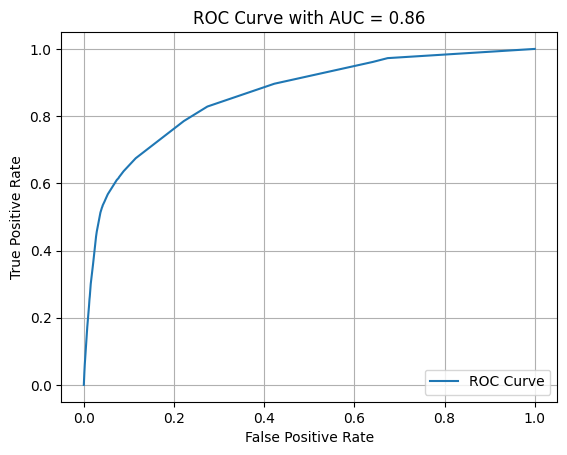

In [12]:



y_proba_test = best_tree.predict_proba(x_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [13]:
Gnb = GaussianNB()
Gnb.fit(x_train, y_train)
ypred_train3 = Gnb.predict(x_train)
y_pred_test3 = Gnb.predict(x_test)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.8623077055888396


In [14]:
print("Training Results\n")
print(classification_report(y_train, ypred_train3))

Training Results

              precision    recall  f1-score   support

           0       0.98      0.87      0.92    163707
           1       0.25      0.67      0.36     10048

    accuracy                           0.86    173755
   macro avg       0.61      0.77      0.64    173755
weighted avg       0.94      0.86      0.89    173755



In [15]:
print('Testing Results\n')
print(classification_report(y_test, y_pred_test3))

Testing Results



              precision    recall  f1-score   support

           0       0.98      0.87      0.92     54560
           1       0.25      0.68      0.36      3359

    accuracy                           0.86     57919
   macro avg       0.61      0.78      0.64     57919
weighted avg       0.94      0.86      0.89     57919



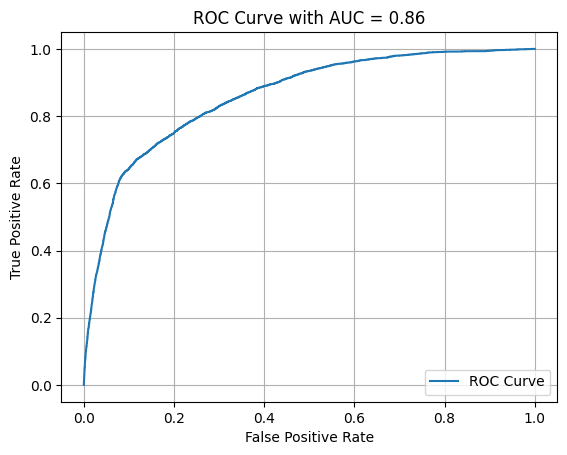

In [16]:
# cross_val_scores = cross_val_score(Gnb, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())


y_proba_test = Gnb.predict_proba(x_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST

Accuracy on Training set:  0.9459871658369543
Accuracy on Test set:  0.945820887791571

Training Results

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    163707
           1       0.58      0.23      0.33     10048

    accuracy                           0.95    173755
   macro avg       0.77      0.61      0.65    173755
weighted avg       0.93      0.95      0.93    173755

Testing Results

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     54560
           1       0.58      0.24      0.34      3359

    accuracy                           0.95     57919
   macro avg       0.77      0.61      0.66     57919
weighted avg       0.93      0.95      0.94     57919



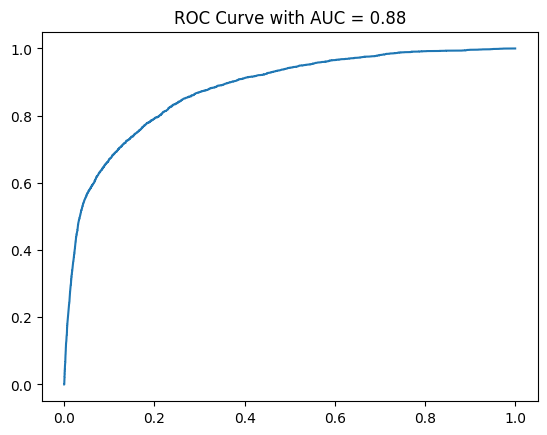

In [17]:



# # Inicjalizacja modelu XGBoost
# xg = XGBClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train, y_train)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_xg = grid_search.best_estimator_

params = {
    'n_estimators': 50,
    'max_depth': 3,
    'learning_rate': 0.2,
    'subsample': 0.8,
    'colsample_bytree': 0.7
}

best_xg = XGBClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    learning_rate=params['learning_rate'],
    subsample=params['subsample'],
    colsample_bytree=params['colsample_bytree']
)
best_xg.fit(x_train, y_train)

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train)
y_pred_test4 = best_xg.predict(x_test)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test, y_pred_test4))


# cross_val_scores = cross_val_score(best_xg, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_test4)))
plt.show()

## logistic regression

Accuracy on Training set:  0.945141147017352
Accuracy on Test set:  0.944612303389216

Training Results

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    163707
           1       0.57      0.20      0.29     10048

    accuracy                           0.95    173755
   macro avg       0.76      0.59      0.63    173755
weighted avg       0.93      0.95      0.93    173755

Testing Results

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     54560
           1       0.56      0.20      0.29      3359

    accuracy                           0.94     57919
   macro avg       0.76      0.59      0.63     57919
weighted avg       0.93      0.94      0.93     57919



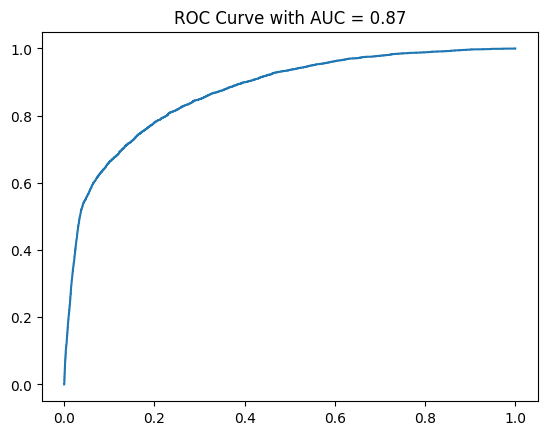

In [18]:




# # Inicjalizacja modelu regresji logistycznej
# lg = LogisticRegression()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
#     'penalty': ['l1', 'l2'],       # Typ regularyzacji
#     'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train, y_train)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_lg = grid_search.best_estimator_

params = {
    'C': 0.01,
    'penalty': 'l2',
    'solver': 'liblinear'
}

best_lg = LogisticRegression(
    C=params['C'],
    penalty=params['penalty'],
    solver=params['solver']
)

best_lg.fit(x_train, y_train)


# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train)
y_pred_test4 = best_lg.predict(x_test)
# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test, y_pred_test4))

# cross_val_scores = cross_val_score(best_lg, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

Accuracy on Training set:  0.9469367787977324
Accuracy on Test set:  0.9458381532830332

Training Results

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    163707
           1       0.65      0.18      0.28     10048

    accuracy                           0.95    173755
   macro avg       0.80      0.59      0.63    173755
weighted avg       0.93      0.95      0.93    173755

Testing Results

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     54560
           1       0.62      0.17      0.27      3359

    accuracy                           0.95     57919
   macro avg       0.79      0.58      0.62     57919
weighted avg       0.93      0.95      0.93     57919



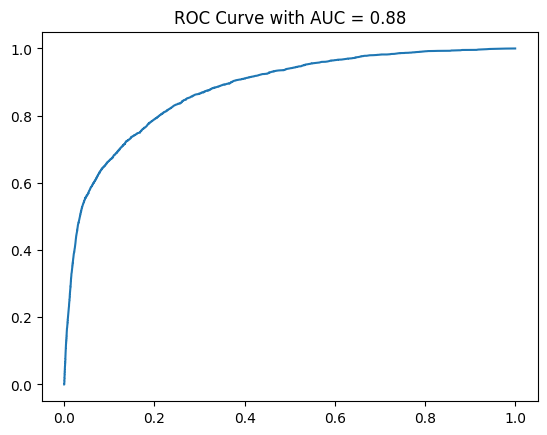

In [19]:



# # Inicjalizacja modelu Gradient Boosting Classifier
# gb = GradientBoostingClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
#     'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
#     'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train, y_train)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_gb = grid_search.best_estimator_

params = {
    'n_estimators': 300,
    'learning_rate': 0.01,
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 2
}

best_gb = GradientBoostingClassifier(
    n_estimators=params['n_estimators'],
    learning_rate=params['learning_rate'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf']
)
best_gb.fit(x_train, y_train)

# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train)
y_pred_test6 = best_gb.predict(x_test)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test, y_pred_test6))


# cross_val_scores = cross_val_score(best_gb, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test, y_proba_test6)))
plt.show()

## KNN

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [21]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)


In [22]:
grid_cv.fit(x_train, 
            y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [23]:
grid_cv.best_score_


0.304975558963513

In [24]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier()

In [25]:
ypred_train = grid_cv.predict(x_train)
y_pred_test = grid_cv.predict(x_test)
print("XGBClassifier Accuracy: ",accuracy_score(y_test, y_pred_test))

XGBClassifier Accuracy:  0.9410038156736131


In [26]:
print("Training Results\n")
print(classification_report(y_train, ypred_train))

Training Results

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    163707
           1       0.70      0.33      0.45     10048

    accuracy                           0.95    173755
   macro avg       0.83      0.66      0.71    173755
weighted avg       0.95      0.95      0.95    173755



In [27]:
print('Testing Results\n')
print(classification_report(y_test, y_pred_test))

Testing Results

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     54560
           1       0.48      0.22      0.30      3359

    accuracy                           0.94     57919
   macro avg       0.72      0.60      0.64     57919
weighted avg       0.93      0.94      0.93     57919



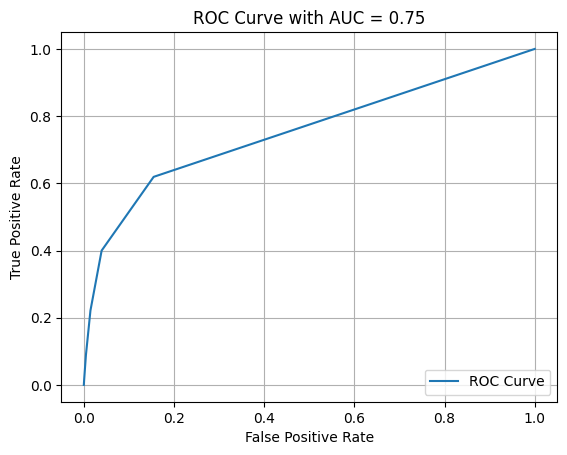

In [28]:

# cross_val_scores = cross_val_score(grid_cv, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = grid_cv.predict_proba(x_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [29]:
ann = tf.keras.models.Sequential()

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [31]:
ann.add(tf.keras.layers.Dense(units=20, activation='relu'))

In [32]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [33]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [34]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
ann.fit(x_train, y_train, batch_size = 32, epochs=100,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/100


5430/5430 [==============================] - 13s 2ms/step - loss: 0.1684 - accuracy: 0.9400 - val_loss: 0.1563 - val_accuracy: 0.9420
Epoch 2/100
5430/5430 [==============================] - 10s 2ms/step - loss: 0.1552 - accuracy: 0.9444 - val_loss: 0.1547 - val_accuracy: 0.9447
Epoch 3/100
5430/5430 [==============================] - 9s 2ms/step - loss: 0.1544 - accuracy: 0.9455 - val_loss: 0.1541 - val_accuracy: 0.9458
Epoch 4/100
5430/5430 [==============================] - 10s 2ms/step - loss: 0.1541 - accuracy: 0.9453 - val_loss: 0.1538 - val_accuracy: 0.9458
Epoch 5/100
5430/5430 [==============================] - 10s 2ms/step - loss: 0.1539 - accuracy: 0.9455 - val_loss: 0.1544 - val_accuracy: 0.9453
Epoch 6/100
5430/5430 [==============================] - 11s 2ms/step - loss: 0.1537 - accuracy: 0.9458 - val_loss: 0.1536 - val_accuracy: 0.9458
Epoch 7/100
5430/5430 [==============================] - 11s 2ms/step - loss: 0.1536 - accuracy: 0.9456 - val_loss: 0.1535 

In [36]:
ypred_train6 = ann.predict(x_train)
y_pred_test6 = ann.predict(x_test)

y_pred_test6 = (y_pred_test6 > 0.5)
ypred_train6 = (ypred_train6 > 0.5)
print(np.concatenate((y_pred_test6.reshape(len(y_pred_test6),1), y_test.reshape(len(y_test),1)),1))

1810/1810 [==============================] - 2s 1ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [37]:
accuracy_score(y_test, y_pred_test6)

0.9458381532830332

In [38]:
print("Training Results\n")
print(classification_report(y_train, ypred_train6))

Training Results

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    163707
           1       0.61      0.20      0.30     10048

    accuracy                           0.95    173755
   macro avg       0.78      0.60      0.64    173755
weighted avg       0.93      0.95      0.93    173755



In [39]:
print('Testing Results\n')
print(classification_report(y_test, y_pred_test6))

Testing Results



              precision    recall  f1-score   support

           0       0.95      0.99      0.97     54560
           1       0.60      0.20      0.30      3359

    accuracy                           0.95     57919
   macro avg       0.78      0.60      0.64     57919
weighted avg       0.93      0.95      0.93     57919



1810/1810 [==============================] - 2s 1ms/step


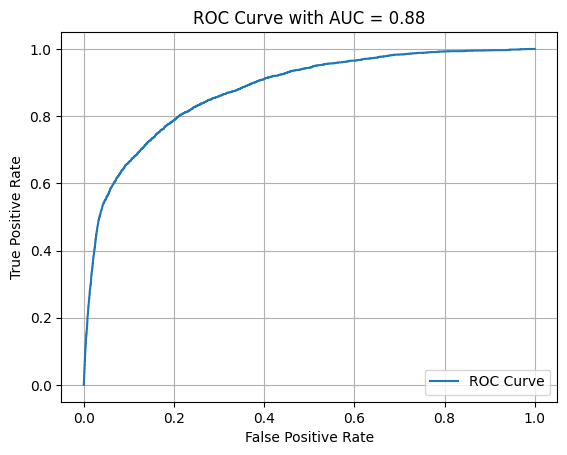

In [40]:
# cross_val_scores = cross_val_score(ann, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = ann.predict(x_test).flatten()


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [41]:

tf.random.set_seed(42)



model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_2.fit(x_train,y_train,epochs = 100)

Epoch 1/100
5430/5430 [==============================] - 8s 1ms/step - loss: 0.1702 - accuracy: 0.9411
Epoch 2/100
5430/5430 [==============================] - 6s 1ms/step - loss: 0.1552 - accuracy: 0.9452
Epoch 3/100
5430/5430 [==============================] - 6s 1ms/step - loss: 0.1544 - accuracy: 0.9456
Epoch 4/100
5430/5430 [==============================] - 6s 1ms/step - loss: 0.1542 - accuracy: 0.9456
Epoch 5/100
5430/5430 [==============================] - 6s 1ms/step - loss: 0.1538 - accuracy: 0.9458
Epoch 6/100
5430/5430 [==============================] - 6s 1ms/step - loss: 0.1536 - accuracy: 0.9459
Epoch 7/100
5430/5430 [==============================] - 6s 1ms/step - loss: 0.1536 - accuracy: 0.9459
Epoch 8/100
5430/5430 [==============================] - 6s 1ms/step - loss: 0.1535 - accuracy: 0.9457
Epoch 9/100
5430/5430 [==============================] - 6s 1ms/step - loss: 0.1533 - accuracy: 0.9458
Epoch 10/100
5430/5430 [==============================] - 6s 1ms/step - l

In [42]:
model_2.evaluate(x_test,y_test)

1810/1810 [==============================] - 4s 2ms/step - loss: 0.1548 - accuracy: 0.9450


[0.15478375554084778, 0.9450439214706421]

In [43]:
ypred_train9 = model_2.predict(x_train)
y_pred_test9 = model_2.predict(x_test)

y_pred_test9 = (y_pred_test9 > 0.5)
ypred_train9 = (ypred_train9 > 0.5)

print(classification_report(y_train,ypred_train9))
print(classification_report(y_test,y_pred_test9))

1810/1810 [==============================] - 3s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    163707
           1       0.63      0.19      0.29     10048

    accuracy                           0.95    173755
   macro avg       0.79      0.59      0.63    173755
weighted avg       0.93      0.95      0.93    173755

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     54560
           1       0.59      0.18      0.27      3359

    accuracy                           0.95     57919
   macro avg       0.77      0.58      0.62     57919
weighted avg       0.93      0.95      0.93     57919



1810/1810 [==============================] - 3s 1ms/step


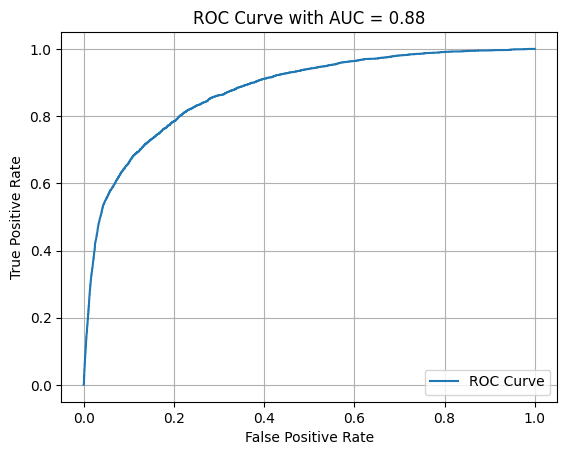

In [44]:
# cross_val_scores = cross_val_score(model_2, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())


y_proba_test = model_2.predict(x_test).flatten()


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [45]:

tf.random.set_seed(42)



model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(40,activation = 'relu'),
  tf.keras.layers.Dense(20,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train,y_train,epochs = 100)

Epoch 1/100
5430/5430 [==============================] - 13s 2ms/step - loss: 0.1636 - accuracy: 0.9433
Epoch 2/100
5430/5430 [==============================] - 13s 2ms/step - loss: 0.1551 - accuracy: 0.9453
Epoch 3/100
5430/5430 [==============================] - 14s 3ms/step - loss: 0.1545 - accuracy: 0.9456
Epoch 4/100
5430/5430 [==============================] - 12s 2ms/step - loss: 0.1542 - accuracy: 0.9455
Epoch 5/100
5430/5430 [==============================] - 11s 2ms/step - loss: 0.1539 - accuracy: 0.9456
Epoch 6/100
5430/5430 [==============================] - 9s 2ms/step - loss: 0.1537 - accuracy: 0.9458
Epoch 7/100
5430/5430 [==============================] - 11s 2ms/step - loss: 0.1536 - accuracy: 0.9458
Epoch 8/100
5430/5430 [==============================] - 13s 2ms/step - loss: 0.1535 - accuracy: 0.9457
Epoch 9/100
5430/5430 [==============================] - 11s 2ms/step - loss: 0.1532 - accuracy: 0.9457
Epoch 10/100
5430/5430 [==============================] - 11s 2ms

In [46]:
model_22.evaluate(x_test,y_test)

1810/1810 [==============================] - 3s 2ms/step - loss: 0.1589 - accuracy: 0.9448


[0.1588544398546219, 0.9447504281997681]

In [47]:
ypred_train91 = model_22.predict(x_train)
y_pred_test91 = model_22.predict(x_test)

y_pred_test91 = (y_pred_test91 > 0.5)
ypred_train91 = (ypred_train91 > 0.5)

print(classification_report(y_train,ypred_train91))
print(classification_report(y_test,y_pred_test91))

1810/1810 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    163707
           1       0.66      0.20      0.31     10048

    accuracy                           0.95    173755
   macro avg       0.81      0.60      0.64    173755
weighted avg       0.94      0.95      0.93    173755

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     54560
           1       0.58      0.17      0.27      3359

    accuracy                           0.94     57919
   macro avg       0.76      0.58      0.62     57919
weighted avg       0.93      0.94      0.93     57919



1810/1810 [==============================] - 4s 2ms/step


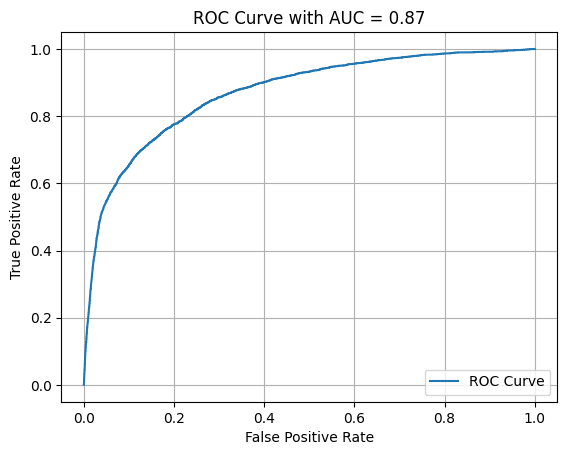

In [48]:

# cross_val_scores = cross_val_score(model_22, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model_22.predict(x_test).flatten()


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [49]:
model1 = Sequential()
model1.add(Dense(units=20,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=15,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
model1.fit(x=x_train, 
          y=y_train, 
          epochs=100,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100


5430/5430 [==============================] - 15s 3ms/step - loss: 0.1974 - val_loss: 0.1571
Epoch 2/100
5430/5430 [==============================] - 12s 2ms/step - loss: 0.1723 - val_loss: 0.1568
Epoch 3/100
5430/5430 [==============================] - 15s 3ms/step - loss: 0.1689 - val_loss: 0.1560
Epoch 4/100
5430/5430 [==============================] - 14s 3ms/step - loss: 0.1678 - val_loss: 0.1576
Epoch 5/100
5430/5430 [==============================] - 12s 2ms/step - loss: 0.1674 - val_loss: 0.1565
Epoch 6/100
5430/5430 [==============================] - 13s 2ms/step - loss: 0.1672 - val_loss: 0.1570
Epoch 7/100
5430/5430 [==============================] - 17s 3ms/step - loss: 0.1667 - val_loss: 0.1566
Epoch 8/100
5430/5430 [==============================] - 14s 3ms/step - loss: 0.1662 - val_loss: 0.1558
Epoch 9/100
5430/5430 [==============================] - 12s 2ms/step - loss: 0.1657 - val_loss: 0.1542
Epoch 10/100
5430/5430 [==============================] - 12s 2ms/step - los

In [51]:
ypred_train11 = model1.predict(x_train)
y_pred_test11 = model1.predict(x_test)

y_pred_test11 = (y_pred_test11 > 0.5)
ypred_train11 = (ypred_train11 > 0.5)

print(classification_report(y_train,ypred_train11))
print(classification_report(y_test,y_pred_test11))

1810/1810 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    163707
           1       0.73      0.04      0.08     10048

    accuracy                           0.94    173755
   macro avg       0.84      0.52      0.53    173755
weighted avg       0.93      0.94      0.92    173755

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     54560
           1       0.69      0.04      0.08      3359

    accuracy                           0.94     57919
   macro avg       0.82      0.52      0.52     57919
weighted avg       0.93      0.94      0.92     57919



1810/1810 [==============================] - 3s 1ms/step


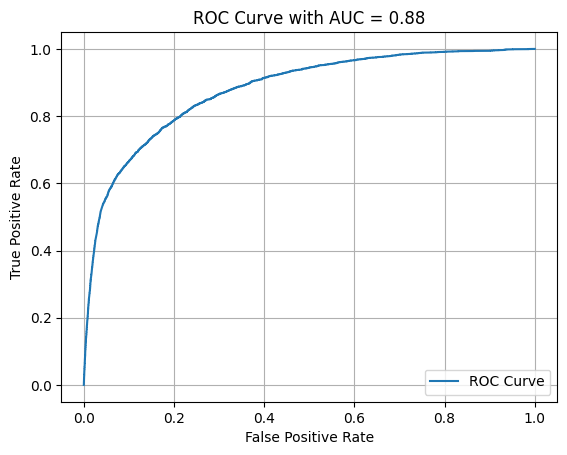

In [52]:
# cross_val_scores = cross_val_score(model1, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model1.predict(x_test).flatten()


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [53]:
model12 = Sequential()



model12.add(Dense(20,  activation='relu'))
model12.add(Dropout(0.2))

model12.add(Dense(10, activation='relu'))
model12.add(Dropout(0.2))

model12.add(Dense(units=1,activation='sigmoid'))

model12.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
model12.fit(x=x_train, 
          y=y_train, 
          epochs=100,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
5430/5430 [==============================] - 14s 2ms/step - loss: 0.1849 - val_loss: 0.1552
Epoch 2/100
5430/5430 [==============================] - 12s 2ms/step - loss: 0.1621 - val_loss: 0.1549
Epoch 3/100
5430/5430 [==============================] - 12s 2ms/step - loss: 0.1598 - val_loss: 0.1543
Epoch 4/100
5430/5430 [==============================] - 12s 2ms/step - loss: 0.1591 - val_loss: 0.1550
Epoch 5/100
5430/5430 [==============================] - 12s 2ms/step - loss: 0.1585 - val_loss: 0.1540
Epoch 6/100
5430/5430 [==============================] - 11s 2ms/step - loss: 0.1582 - val_loss: 0.1544
Epoch 7/100
5430/5430 [==============================] - 12s 2ms/step - loss: 0.1582 - val_loss: 0.1560
Epoch 8/100
5430/5430 [==============================] - 12s 2ms/step - loss: 0.1579 - val_loss: 0.1544
Epoch 9/100
5430/5430 [==============================] - 11s 2ms/step - loss: 0.1581 - val_loss: 0.1540
Epoch 10/100
5430/5430 [==============================] - 12s 2m

In [55]:
ypred_train12 = model12.predict(x_train)
y_pred_test12 = model12.predict(x_test)

y_pred_test12 = (y_pred_test12 > 0.5)
ypred_train12 = (ypred_train12 > 0.5)

print(classification_report(y_train,ypred_train12))
print(classification_report(y_test,y_pred_test12))

1810/1810 [==============================] - 2s 929us/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    163707
           1       0.69      0.08      0.15     10048

    accuracy                           0.94    173755
   macro avg       0.82      0.54      0.56    173755
weighted avg       0.93      0.94      0.92    173755

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     54560
           1       0.65      0.08      0.14      3359

    accuracy                           0.94     57919
   macro avg       0.80      0.54      0.55     57919
weighted avg       0.93      0.94      0.92     57919



1810/1810 [==============================] - 2s 915us/step


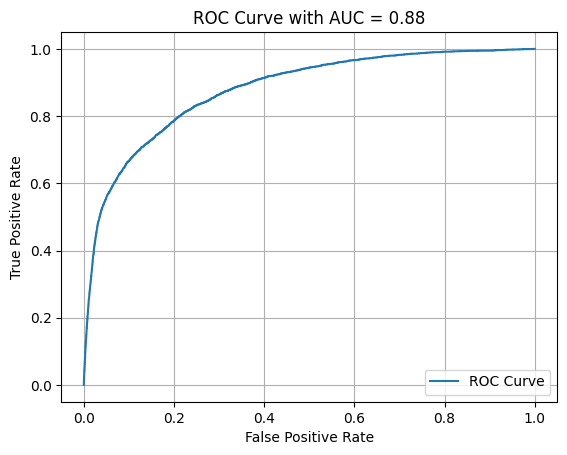

In [56]:
# cross_val_scores = cross_val_score(model12, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model12.predict(x_test).flatten()


fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [57]:
# model3 = SVC(probability=True)

In [58]:
# model3.fit(x_train,y_train)

In [59]:
# ypred_train14 = model3.predict(x_train)
# y_pred_test14 = model3.predict(x_test)


# print(classification_report(y_train,ypred_train14))
# print(classification_report(y_test,y_pred_test14))

In [60]:
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [61]:
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [62]:
# grid.fit(x_train,y_train) 

In [63]:
# grid.best_params_

In [64]:
# grid.best_estimator_

In [65]:
# ypred_train = grid.predict(x_train)
# y_pred_test = grid.predict(x_test)

# print(classification_report(y_train,ypred_train))
# print(classification_report(y_test,y_pred_test))

In [66]:



# y_proba_test = grid.predict_proba(x_test)[:, 1]


# fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)


# plt.plot(fpr, tpr, label='ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
# plt.legend(loc='lower right')
# plt.grid(True)
# plt.show()

Training Results

              precision    recall  f1-score   support

           0       0.95      1.00      0.97    163707
           1       0.70      0.05      0.10     10048

    accuracy                           0.94    173755
   macro avg       0.82      0.53      0.54    173755
weighted avg       0.93      0.94      0.92    173755

Testing Results

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     54560
           1       0.65      0.05      0.10      3359

    accuracy                           0.94     57919
   macro avg       0.80      0.52      0.53     57919
weighted avg       0.93      0.94      0.92     57919



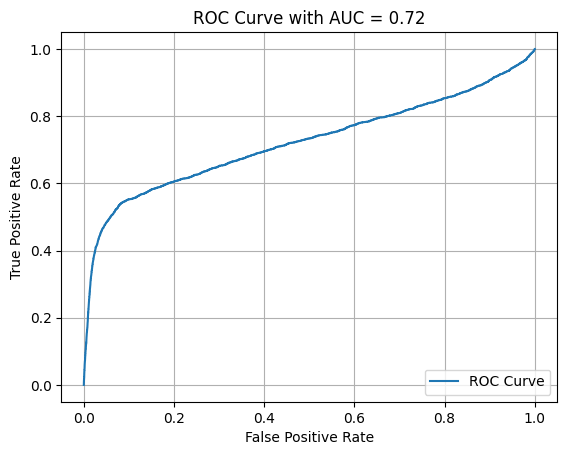

In [67]:

model3 = SVC(C=0.1, gamma=1, kernel='rbf', probability=True)
model3.fit(x_train, y_train)


ypred_train14 = model3.predict(x_train)
y_pred_test14 = model3.predict(x_test)


print("Training Results\n")
print(classification_report(y_train, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test, y_pred_test14))

# cross_val_scores = cross_val_score(model3, x_train, y_train, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model3.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()